# Exercise 5 - Regularized Linear Regression and Bias v.s. Variance

## 5.1 Dam waterflow

### Import libraries

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Read the data

In [2]:
data = loadmat("ex5data1.mat")

X = data["X"]
y = data["y"]

Xtest = data["Xtest"]
ytest = data["ytest"]

Xval = data["Xval"]
yval = data["yval"]

m = X.shape[0]

### Visualize the data

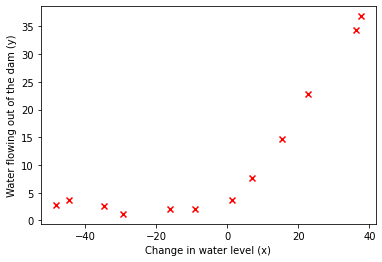

In [3]:
plt.scatter(X, y, marker = "x", color = "red")

plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")

plt.show()

### Cost function

In [4]:
def linearRegCostFunction(theta, X, y, lmbda):
    m = len(y)
    
    J = np.sum(np.power(X @ theta - y, 2)) / (2 * m) 
    reg = lmbda * np.sum(np.power(theta[1:], 2)) / (2 * m)
    
    return (J + reg)


### Gradient function

In [5]:
def linearRegGradientFunction(theta, X, y, lmbda):
    m = len(y)
    
    grad = X.T @ ((X @ theta) - y) / m
    grad[1:] += (lmbda / m) * theta[1:]
    
    return grad


### Compute cost 

In [6]:
theta = np.ones((2, 1))
J = linearRegCostFunction(theta, np.hstack((np.ones((m, 1)), X)), y, 1)

print("Cost at theta = [1, 1]: %f " % J)
print("(this value should be about 303.993192)\n")

Cost at theta = [1, 1]: 303.993192 
(this value should be about 303.993192)



### Compute Gradient

In [7]:
theta = np.ones((2, 1))
grad = linearRegGradientFunction(theta, np.hstack((np.ones((m, 1)), X)), y, 1)

print("Gradient at theta = [1, 1]:  [%f, %f]" % (grad[0][0], grad[1][0]))
print("(this value should be about [-15.303016, 598.250744])\n")

Gradient at theta = [1, 1]:  [-15.303016, 598.250744]
(this value should be about [-15.303016, 598.250744])



### Train linear regression

In [8]:
def trainLinearReg(X, y, lmbda):

    initial_theta = np.zeros((X.shape[1], 1))

    costFunction = lambda t: linearRegCostFunction(t, X, y.flatten(), lmbda)
    gradFunction = lambda t: linearRegGradientFunction(t, X, y.flatten(), lmbda)

    theta = opt.fmin_cg(f = costFunction, x0 = initial_theta, fprime = gradFunction, maxiter = 200, disp = 0)
    return theta.reshape((X.shape[1], 1))
    

In [9]:
lmbda = 0
theta = trainLinearReg(np.hstack((np.ones((m, 1)), X)), y, lmbda)

#### Plot the model

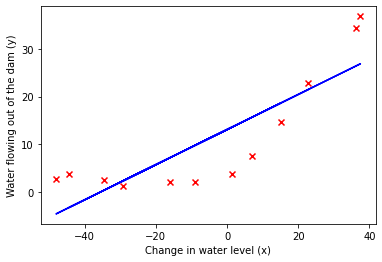

In [10]:
plt.scatter(X, y, marker = "x", color = "red")

plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.plot(X, np.dot(np.hstack((np.ones((m, 1)), X)), theta), color = "blue")

plt.show()

### Learning curve for linear regression

In [11]:
def learningCurve(X, y, Xval, yval, lmbda):
    m = X.shape[0]

    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    for i in range(1, m + 1):
        X_sub = X[:i, :]
        y_sub = y[:i, :]
        theta = trainLinearReg(X_sub, y_sub, lmbda)
        error_train[i - 1, 0] = linearRegCostFunction(theta, X_sub, y_sub, 0)
        error_val[i - 1, 0] = linearRegCostFunction(theta, Xval, yval, 0)
    return [error_train, error_val]

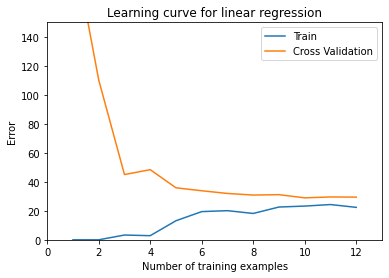

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096

  	2		0.000000	110.300366

  	3		3.286595	45.010232

  	4		2.842678	48.368911

  	5		13.154049	35.865141

  	6		19.443963	33.829957

  	7		20.098522	31.970987

  	8		18.172859	30.862446

  	9		22.609405	31.135998

  	10		23.261462	28.936207

  	11		24.317250	29.551432

  	12		22.373906	29.433818



In [12]:
lmbda = 0
[error_train, error_val] = learningCurve(np.hstack((np.ones((m, 1)), X)), y, np.hstack((np.ones((Xval.shape[0], 1)), Xval)), yval, lmbda)

plt.plot(range(1, m + 1), error_train, label = "Train")
plt.plot(range(1, m + 1), error_val, label = "Cross Validation")
plt.title("Learning curve for linear regression")
plt.legend()
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.axis((0, 13, 0, 150))
plt.show()

print("# Training Examples\tTrain Error\tCross Validation Error")
for i in range(m):
    print("  \t%d\t\t%f\t%f\n" % (i + 1, error_train[i], error_val[i]))

### Feature mapping for polynomial regression

In [13]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))

    for i in range(p):
        X_poly[:, i] = np.power(X, i + 1).flatten()

    return X_poly

In [14]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    return [(X - mu) / sigma, mu, sigma]

In [15]:
p = 8

X_poly = polyFeatures(X, p)
[X_poly, mu, sigma] = featureNormalize(X_poly)
X_poly = np.hstack((np.ones((m, 1)), X_poly))

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))    

print("Normalized Training Example 1:")
print(X_poly[0, :])

Normalized Training Example 1:
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


### Learning curve for polynomial regression

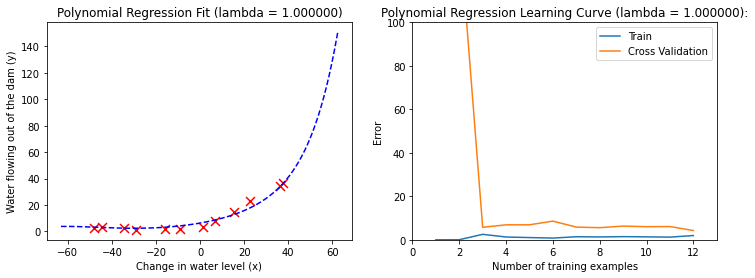

Polynomial Regression (lambda = 1.000000)
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777

  	2		0.042836	143.502691

  	3		2.515225	5.749579

  	4		1.285542	6.890097

  	5		1.028319	6.900654

  	6		0.794932	8.581216

  	7		1.409965	5.842283

  	8		1.316233	5.575902

  	9		1.458734	6.300257

  	10		1.353297	6.033544

  	11		1.228538	6.089721

  	12		1.958695	4.263359



In [16]:
lmbda = 1
theta = trainLinearReg(X_poly, y, lmbda)

x = np.arange(float(np.min(X) - 15), float(np.max(X) + 25), 0.05)

x_poly = polyFeatures(x, p)
x_poly = x_poly - mu 
x_poly = x_poly / sigma

x_poly = np.hstack((np.ones((x.shape[0], 1)), x_poly))

_, (plt1, plt2) = plt.subplots(1, 2, figsize = (12, 4))

plt1.scatter(X, y, marker = "x", color = "red", s = 80)
plt1.set_title("Polynomial Regression Fit (lambda = %f)" % lmbda)
plt1.set_xlabel("Change in water level (x)")
plt1.set_ylabel("Water flowing out of the dam (y)")
plt1.plot(x, x_poly @ theta, linestyle = "--", color = "blue")

[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lmbda)

plt2.plot(range(1, m + 1), error_train, label = "Train")
plt2.plot(range(1, m + 1), error_val, label = "Cross Validation")
plt2.set_title("Polynomial Regression Learning Curve (lambda = %f):" % lmbda)
plt2.legend()
plt2.set_xlabel("Number of training examples")
plt2.set_ylabel("Error")
plt2.axis((0, 13, 0, 100))

plt.show()

print("Polynomial Regression (lambda = %f)" % lmbda)
print("# Training Examples\tTrain Error\tCross Validation Error")
for i in range(m):
    print("  \t%d\t\t%f\t%f\n" % (i + 1, error_train[i], error_val[i]))

### Validation for Selecting Lambda

In [17]:
def validationCurve(X, y, Xval, yval):
    lmbda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    error_train = np.zeros((len(lmbda_vec), 1))
    error_val = np.zeros((len(lmbda_vec), 1))
    theta_history = np.zeros((len(lmbda_vec), X.shape[1]))

    for i in range(len(lmbda_vec)):
        lmbda = lmbda_vec[i]
        theta = trainLinearReg(X, y, lmbda)
        error_train[i] = linearRegCostFunction(theta, X, y, 0)
        error_val[i] = linearRegCostFunction(theta, Xval, yval, 0)
        theta_history[i, :] = theta.flatten()

    return [lmbda_vec, error_train, error_val]

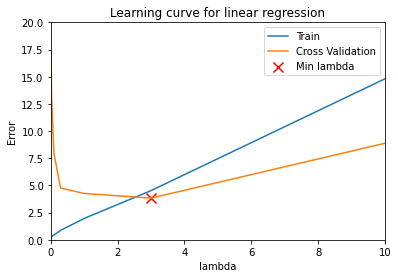

	lambda		Train Error	Cross Validation Error
  	0.000000		0.087349	8.270474

  	0.001000		0.146251	14.691601

  	0.003000		0.166748	15.929347

  	0.010000		0.217953	17.154822

  	0.030000		0.275181	13.217860

  	0.100000		0.438642	7.927093

  	0.300000		0.868162	4.760811

  	1.000000		1.958695	4.263359

  	3.000000		4.525105	3.832176

  	10.000000		14.825808	8.889725

Minimum cross validation error at lambda = 3.000000


In [18]:
[lmbda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval)
lmbda_opt_pos = error_val.argmin()
lmbda_opt = lmbda_vec[lmbda_opt_pos]

plt.plot(lmbda_vec, error_train, label = "Train")
plt.plot(lmbda_vec, error_val, label = "Cross Validation")
plt.scatter(lmbda_opt, error_val[lmbda_opt_pos], marker = "x", color = "red", s = 100, label="Min lambda")
plt.title("Learning curve for linear regression")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("Error")
plt.axis((0, 10, 0, 20))
plt.show()

print("\tlambda\t\tTrain Error\tCross Validation Error")
for i in range(len(lmbda_vec)):
    print("  \t%f\t\t%f\t%f\n" % (lmbda_vec[i], error_train[i], error_val[i]))
print("Minimum cross validation error at lambda = %f" % lmbda_opt)

### Computing test set error

In [19]:
theta_opt = trainLinearReg(X_poly, y, lmbda_opt)
error_test = linearRegCostFunction(theta_opt, X_poly_test, ytest, 0)
print("Test set error: %f\n" % error_test)

Test set error: 3.572027



### Plotting learning curves with randomly selected examples

In [20]:
def learningCurveRandom(X, y, Xval, yval, lmbda):
    m = X.shape[0]

    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    for i in range(1, m + 1):
        error_train_rand = 0
        error_val_rand = 0
        for _ in range(50):
            train_index = np.random.choice(X.shape[0], i, replace = False)
            X_train_sub = X[train_index]
            y_train_sub = y[train_index]
            val_index = np.random.choice(Xval.shape[0], i, replace = False)
            X_val_sub = Xval[val_index]
            y_val_sub = yval[val_index]
            theta = trainLinearReg(X_train_sub, y_train_sub, lmbda)
            error_train_rand += np.sum(np.power(X_train_sub @ theta - y_train_sub, 2)) / (2 * i)
            error_val_rand += np.sum(np.power(X_val_sub @ theta - y_val_sub, 2)) / (2 * i)
        
        error_train[i - 1, 0] += error_train_rand / 50
        error_val[i - 1, 0] += error_val_rand / 50

    return [error_train, error_val]


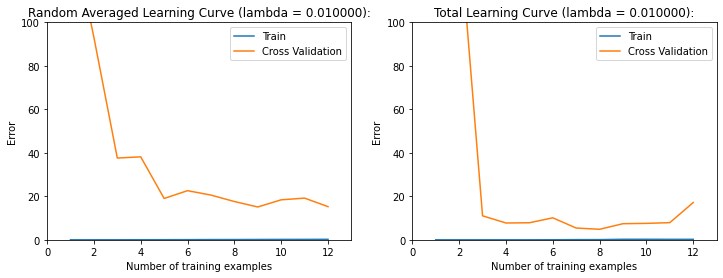

In [21]:
lmbda_rand_test = 0.01
_, (plt1, plt2) = plt.subplots(1, 2, figsize = (12, 4))

[error_train, error_val] = learningCurveRandom(X_poly, y, X_poly_val, yval, lmbda_rand_test)

plt1.plot(range(1, m + 1), error_train, label = "Train")
plt1.plot(range(1, m + 1), error_val, label = "Cross Validation")
plt1.set_title("Random Averaged Learning Curve (lambda = %f):" % lmbda_rand_test)
plt1.legend()
plt1.set_xlabel("Number of training examples")
plt1.set_ylabel("Error")
plt1.axis((0, 13, 0, 100))

[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lmbda_rand_test)

plt2.plot(range(1, m + 1), error_train, label = "Train")
plt2.plot(range(1, m + 1), error_val, label = "Cross Validation")
plt2.set_title("Total Learning Curve (lambda = %f):" % lmbda_rand_test)
plt2.legend()
plt2.set_xlabel("Number of training examples")
plt2.set_ylabel("Error")
plt2.axis((0, 13, 0, 100))

plt.show()